# King County House Sales Regression Analysis
## Data Modeling

* Student name: Spencer Hadel
* Student pace: Flex
* Scheduled project review date/time: 5/5/2022, 11:00am EST
* Instructor name: Claude Fried

#### Objective

In order to help a new real estate company in King County, we need to analyze past house sales data in the region and create a linear regression model which can help the company better understand what factors contribute to price of a given home. We will import over 20 thousand data points from recent sales in the King County area, and proceed to clean, preprocess, and model the information present in this dataset in order to inform the new company on how to appropriately assess the value of a home when helping a client buy or sell a home.

### Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, ShuffleSplit

from sklearn.metrics import mean_squared_error

### Import Prepared Data from kc_preprocessing_exploring.ipynb

We have already preprocessed our data in the kc_kc_preprocessing_exploring notebook:

[Preprocessing Notebook](./kc_preprocessing_exploring.ipynb)

In [2]:
pre_df = pd.read_csv('./data/preprocessed.csv', index_col = 0)

untransformed_df = pd.read_csv('./data/untransformed.csv', index_col = 0)

In [3]:
df = untransformed_df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21534 non-null  float64
 1   sqft_living          21534 non-null  int64  
 2   sqft_lot             21534 non-null  int64  
 3   yr_built             21534 non-null  int64  
 4   bedrooms             21534 non-null  int64  
 5   bathrooms            21534 non-null  float64
 6   floors               21534 non-null  float64
 7   renovated_2000_1     21534 non-null  int64  
 8   grade_11 Excellent   21534 non-null  int64  
 9   grade_12 Luxury      21534 non-null  int64  
 10  grade_13 Mansion     21534 non-null  int64  
 11  grade_3 Poor         21534 non-null  int64  
 12  grade_4 Low          21534 non-null  int64  
 13  grade_5 Fair         21534 non-null  int64  
 14  grade_6 Low Average  21534 non-null  int64  
 15  grade_7 Average      21534 non-null 

In [5]:
subs = [(' ', '_'),('.','_'),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

list(df.columns)

['price',
 'sqft_living',
 'sqft_lot',
 'yr_built',
 'bedrooms',
 'bathrooms',
 'floors',
 'renovated_2000_1',
 'grade_11_Excellent',
 'grade_12_Luxury',
 'grade_13_Mansion',
 'grade_3_Poor',
 'grade_4_Low',
 'grade_5_Fair',
 'grade_6_Low_Average',
 'grade_7_Average',
 'grade_8_Good',
 'grade_9_Better',
 'condition_Fair',
 'condition_Good',
 'condition_Poor',
 'condition_Very_Good',
 'view_EXCELLENT',
 'view_FAIR',
 'view_GOOD',
 'view_NONE',
 'waterfront_YES']

## Split, Train and Test Data

Now that we have a complete preprocessed dataset, we need to split the data into train and test datasets, as well as identify the feature we are testing for: price.

In [6]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#check size of each
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16150, 26), (5384, 26), (16150,), (5384,))

In [7]:
X_1 = X_train
y = y_train

model_1 = sm.OLS(y, sm.add_constant(X_1)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1357.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        23:43:19   Log-Likelihood:            -2.2050e+05
No. Observations:               16150   AIC:                         4.411e+05
Df Residuals:                   16124   BIC:                         4.413e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.753e+06   1.51e+05     44.843      0.000    6.46e+06    7.05e+06
sqft_living           134.5643      3.782     35.576      0.000     127.150     141.978
sqft_lot               -0.2818      0.042     -6.658      0.000      -0.365      -0.199
yr_built            -3140.6965     76.946    -40.817      0.000   -3291.519   -2989.874
bedrooms            -2.722e+04   2396.805    -11.358      0.000   -3.19e+04   -2.25e+04
bathrooms            4.834e+04   3849.124     12.558      0.000    4.08e+04    5.59e+04
floors               3.358e+04   3833.280      8.761      0.000    2.61e+04    4.11e+04
renovated_2000_1     1.016e+05   1.26e+04      8.028      0.000    7.68e+04    1.26e+05
grade_11_Excellent   2.792e+05   1.42e+04     19.651      0.000    2.51e+05    3.07e+05
grade_12_Luxury      7.137e+05   2.71e+04     26.326      0.000    6.61e+05    7.67e+05
grade_13_Mansion     1.245e+06   7.39e+04     16.851      0.000     1.1e+06    1.39e+06
grade_3_Poor        -6.835e-10    7.5e-10     -0.911      0.362   -2.15e-09    7.87e-10
grade_4_Low         -5.652e+05   4.75e+04    -11.891      0.000   -6.58e+05   -4.72e+05
grade_5_Fair        -5.599e+05   1.88e+04    -29.842      0.000   -5.97e+05   -5.23e+05
grade_6_Low_Average -4.925e+05   1.16e+04    -42.528      0.000   -5.15e+05    -4.7e+05
grade_7_Average     -4.109e+05   9484.272    -43.327      0.000    -4.3e+05   -3.92e+05
grade_8_Good        -3.226e+05   8670.519    -37.208      0.000    -3.4e+05   -3.06e+05
grade_9_Better       -1.84e+05   8657.969    -21.256      0.000   -2.01e+05   -1.67e+05
condition_Fair      -3.239e+04   1.93e+04     -1.682      0.093   -7.01e+04    5355.013
condition_Good       1.785e+04   4065.825      4.391      0.000    9883.266    2.58e+04
condition_Poor      -4.473e+04   4.42e+04     -1.011      0.312   -1.31e+05     4.2e+04
condition_Very_Good  6.084e+04   6550.243      9.288      0.000     4.8e+04    7.37e+04
view_EXCELLENT       2.178e+05   1.78e+04     12.215      0.000    1.83e+05    2.53e+05
view_FAIR            7.599e+04   1.54e+04      4.923      0.000    4.57e+04    1.06e+05
view_GOOD              5.9e+04   1.31e+04      4.511      0.000    3.34e+04    8.46e+04
view_NONE            -5.75e+04   8089.755     -7.107      0.000   -7.34e+04   -4.16e+04
waterfront_YES       5.348e+05   2.38e+04     22.503      0.000    4.88e+05    5.81e+05
==============================================================================
Omnibus:                     9059.413   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           319403.693
Skew:                           2.093   Prob(JB):                         0.00
Kurtosis:                      24.381   Cond. No.                     1.09e+16
================================================

Purely for exploration, next we train our model on the test data.

In [8]:
orig_model = LinearRegression()

# Fit the model on X_train_final and y_train
orig_model.fit(X_train, y_train)

orig_model.score(X_test, y_test)

0.6814435760745338

### Remove Uninfluential Features

The first issue with our model is the number of features. This much potential noise is likely not helping our model properly train itself on the relevant data.

In order to reduce the number of features, we will first use scikit-learn's feature_selection submodule to select only the most important features.

In [9]:
# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_1)

# Instantiate and fit the selector
selector = RFECV(LinearRegression(), cv=ShuffleSplit(n_splits=3, test_size=0.25, random_state=0))
selector.fit(X_train_for_RFECV, y_train)

selected_features = []

# Relevant Features:
for index, col in enumerate(X_1.columns):
    if selector.support_[index] == True:
        selected_features.append(col)
        #print(col)

print(selected_features)

['sqft_living', 'sqft_lot', 'yr_built', 'bedrooms', 'bathrooms', 'floors', 'renovated_2000_1', 'grade_11_Excellent', 'grade_12_Luxury', 'grade_13_Mansion', 'grade_4_Low', 'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average', 'grade_8_Good', 'grade_9_Better', 'condition_Fair', 'condition_Good', 'condition_Poor', 'condition_Very_Good', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE', 'waterfront_YES']


Now we rerun the model with only the feature_selector's most important features.

In [10]:
X_2 = X_train[selected_features]

model_2 = sm.OLS(y, sm.add_constant(X_2)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1357.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        23:43:21   Log-Likelihood:            -2.2050e+05
No. Observations:               16150   AIC:                         4.411e+05
Df Residuals:                   16124   BIC:                         4.413e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.753e+06   1.51e+05     44.843      0.000    6.46e+06    7.05e+06
sqft_living           134.5643      3.782     35.576      0.000     127.150     141.978
sqft_lot               -0.2818      0.042     -6.658      0.000      -0.365      -0.199
yr_built            -3140.6965     76.946    -40.817      0.000   -3291.519   -2989.874
bedrooms            -2.722e+04   2396.805    -11.358      0.000   -3.19e+04   -2.25e+04
bathrooms            4.834e+04   3849.124     12.558      0.000    4.08e+04    5.59e+04
floors               3.358e+04   3833.280      8.761      0.000    2.61e+04    4.11e+04
renovated_2000_1     1.016e+05   1.26e+04      8.028      0.000    7.68e+04    1.26e+05
grade_11_Excellent   2.792e+05   1.42e+04     19.651      0.000    2.51e+05    3.07e+05
grade_12_Luxury      7.137e+05   2.71e+04     26.326      0.000    6.61e+05    7.67e+05
grade_13_Mansion     1.245e+06   7.39e+04     16.851      0.000     1.1e+06    1.39e+06
grade_4_Low         -5.652e+05   4.75e+04    -11.891      0.000   -6.58e+05   -4.72e+05
grade_5_Fair        -5.599e+05   1.88e+04    -29.842      0.000   -5.97e+05   -5.23e+05
grade_6_Low_Average -4.925e+05   1.16e+04    -42.528      0.000   -5.15e+05    -4.7e+05
grade_7_Average     -4.109e+05   9484.272    -43.327      0.000    -4.3e+05   -3.92e+05
grade_8_Good        -3.226e+05   8670.519    -37.208      0.000    -3.4e+05   -3.06e+05
grade_9_Better       -1.84e+05   8657.969    -21.256      0.000   -2.01e+05   -1.67e+05
condition_Fair      -3.239e+04   1.93e+04     -1.682      0.093   -7.01e+04    5355.013
condition_Good       1.785e+04   4065.825      4.391      0.000    9883.266    2.58e+04
condition_Poor      -4.473e+04   4.42e+04     -1.011      0.312   -1.31e+05     4.2e+04
condition_Very_Good  6.084e+04   6550.243      9.288      0.000     4.8e+04    7.37e+04
view_EXCELLENT       2.178e+05   1.78e+04     12.215      0.000    1.83e+05    2.53e+05
view_FAIR            7.599e+04   1.54e+04      4.923      0.000    4.57e+04    1.06e+05
view_GOOD              5.9e+04   1.31e+04      4.511      0.000    3.34e+04    8.46e+04
view_NONE            -5.75e+04   8089.755     -7.107      0.000   -7.34e+04   -4.16e+04
waterfront_YES       5.348e+05   2.38e+04     22.503      0.000    4.88e+05    5.81e+05
==============================================================================
Omnibus:                     9059.413   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           319403.693
Skew:                           2.093   Prob(JB):                         0.00
Kurtosis:                      24.381   Cond. No.                     3.91e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

This yielded approximately the same R squared score, which is good because it means the features we removed were in fact very inconsequential to the outcome of our model. It also removed any feature with a value above the threshold of 0.05, removing our need to do this manually.

### Investigate Multicollinearity

The Cond. No is above 30 (which indicates strong multicollinearity) the next step is to check our features for multicollinearity, and remove any features that may be impacting each other in a way that trains our model incorrectly.

We can start by investigating multicollinearity the same way as the preprocessing step.

In [11]:
corr = X_2.corr()
corr

,sqft_living,sqft_lot,yr_built,bedrooms,bathrooms,floors,renovated_2000_1,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,...,grade_9_Better,condition_Fair,condition_Good,condition_Poor,condition_Very_Good,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,waterfront_YES
sqft_living,1.000000,0.178186,0.320254,0.591288,0.755773,0.353173,0.051576,0.347672,0.238514,0.112582,...,0.316570,-0.059890,-0.083777,-0.033230,-0.020590,0.182106,0.065413,0.155649,-0.274984,0.116537
sqft_lot,0.178186,1.000000,0.053090,0.043413,0.091696,-0.005552,-0.011045,0.066847,0.053097,0.006680,...,0.054842,0.025840,0.011211,0.006698,-0.013856,0.027595,-0.006719,0.064892,-0.069482,0.016944
yr_built,0.320254,0.053090,1.000000,0.164939,0.510993,0.491254,-0.124151,0.092158,0.046707,0.003006,...,0.216243,-0.064862,-0.259523,-0.050104,-0.245844,-0.021187,-0.029460,-0.018461,0.060906,-0.022120
bedrooms,0.591288,0.043413,0.164939,1.000000,0.525696,0.178505,0.031455,0.120638,0.060942,0.031025,...,0.159485,-0.049212,-0.012831,-0.026470,0.021299,0.036287,0.018583,0.054128,-0.077461,-0.002254
bathrooms,0.755773,0.091696,0.510993,0.525696,1.000000,0.503658,0.065414,0.250578,0.160001,0.074430,...,0.267363,-0.069136,-0.170069,-0.041236,-0.033056,0.111308,0.040409,0.111317,-0.177490,0.069792
floors,0.353173,-0.005552,0.491254,0.178505,0.503658,1.000000,0.007645,0.116771,0.057793,0.020708,...,0.242924,-0.050632,-0.259292,-0.021534,-0.120350,0.016453,-0.019769,0.018535,-0.012770,0.017486
renovated_2000_1,0.051576,-0.011045,-0.124151,0.031455,0.065414,0.007645,1.000000,0.002716,-0.001326,0.017986,...,0.037967,-0.011581,-0.068739,-0.004985,-0.034211,0.013342,0.014501,0.028076,-0.035615,0.016343
grade_11_Excellent,0.347672,0.066847,0.092158,0.120638,0.250578,0.116771,0.002716,1.000000,-0.008692,-0.003021,...,-0.050050,-0.011642,-0.038574,-0.005012,-0.022355,0.084622,0.045110,0.070474,-0.135001,0.082464
grade_12_Luxury,0.238514,0.053097,0.046707,0.060942,0.160001,0.057793,-0.001326,-0.008692,1.000000,-0.001426,...,-0.023627,-0.005496,-0.011678,-0.002366,-0.011492,0.133484,0.000220,0.028288,-0.093130,0.086919
grade_13_Mansion,0.112582,0.006680,0.003006,0.031025,0.074430,0.020708,0.017986,-0.003021,-0.001426,1.000000,...,-0.008211,-0.001910,-0.006935,-0.000822,-0.006501,0.042291,-0.002723,0.014819,-0.039456,-0.001885


In [12]:
sns.set(rc = {'figure.figsize':(15,15)})

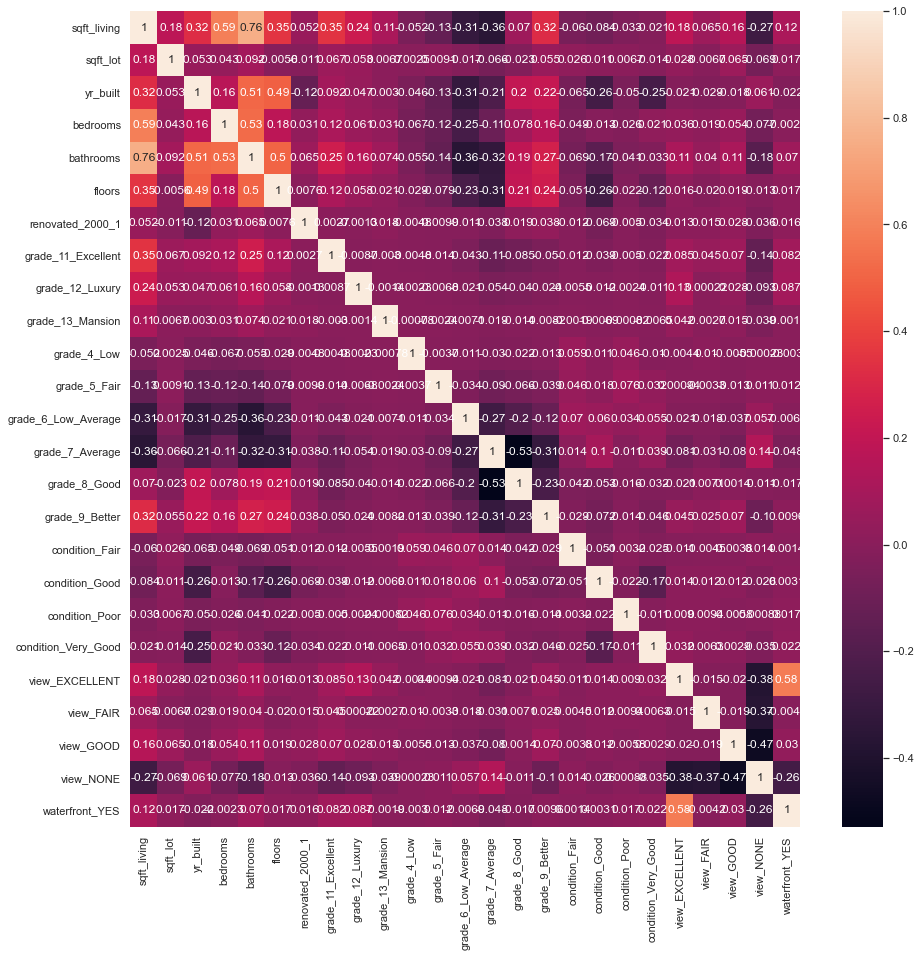

In [13]:
sns.heatmap(corr, annot = True);

There are still a lot of features, making this hard to look at and understand at a galnce. So we will use statsmodels' variance_inflation_factor to look at this information more clearly.

In [14]:
vif = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif_scores = list(zip(X_2, vif))
vif_scores

[('sqft_living', 27.73341352018669),
 ('sqft_lot', 1.2025048472805784),
 ('yr_built', 98.2306094453276),
 ('bedrooms', 26.433466734539934),
 ('bathrooms', 26.015278080170123),
 ('floors', 13.89446621123189),
 ('renovated_2000_1', 1.0341613661670366),
 ('grade_11_Excellent', 1.3897716395024222),
 ('grade_12_Luxury', 1.1437645568203691),
 ('grade_13_Mansion', 1.0302024834144135),
 ('grade_4_Low', 1.060044890698966),
 ('grade_5_Fair', 1.4594896230546033),
 ('grade_6_Low_Average', 4.5040018955104095),
 ('grade_7_Average', 13.923723450912531),
 ('grade_8_Good', 7.952380097834717),
 ('grade_9_Better', 3.4126240935723855),
 ('condition_Fair', 1.0293007310356128),
 ('condition_Good', 1.5569481492976316),
 ('condition_Poor', 1.0133278296811765),
 ('condition_Very_Good', 1.1736460070507144),
 ('view_EXCELLENT', 1.8731385738180248),
 ('view_FAIR', 1.3367171189141829),
 ('view_GOOD', 1.5428232547753564),
 ('view_NONE', 22.417106150986825),
 ('waterfront_YES', 1.5315527133524351)]

In [15]:
new_features = [x for x,vif in vif_scores if vif < 5]
new_features

['sqft_lot',
 'renovated_2000_1',
 'grade_11_Excellent',
 'grade_12_Luxury',
 'grade_13_Mansion',
 'grade_4_Low',
 'grade_5_Fair',
 'grade_6_Low_Average',
 'grade_9_Better',
 'condition_Fair',
 'condition_Good',
 'condition_Poor',
 'condition_Very_Good',
 'view_EXCELLENT',
 'view_FAIR',
 'view_GOOD',
 'waterfront_YES']

Now that we have checked for uninfluential features as well as features potentially causing multicollinearity, we run the tests again.

In [16]:
X_3 = X_train[new_features]

model_3 = sm.OLS(y, sm.add_constant(X_3)).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     773.5
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        23:43:30   Log-Likelihood:            -2.2484e+05
No. Observations:               16150   AIC:                         4.497e+05
Df Residuals:                   16132   BIC:                         4.498e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.637e+05   3036.914    152.679      0.000    4.58e+05     4.7e+05
sqft_lot                0.2236      0.054      4.116      0.000       0.117       0.330
renovated_2000_1     2.509e+05   1.61e+04     15.624      0.000    2.19e+05    2.82e+05
grade_11_Excellent   9.198e+05   1.61e+04     56.968      0.000    8.88e+05    9.51e+05
grade_12_Luxury      1.477e+06   3.36e+04     43.930      0.000    1.41e+06    1.54e+06
grade_13_Mansion     2.256e+06   9.54e+04     23.643      0.000    2.07e+06    2.44e+06
grade_4_Low         -2.814e+05   6.04e+04     -4.655      0.000      -4e+05   -1.63e+05
grade_5_Fair        -2.704e+05   2.03e+04    -13.341      0.000    -3.1e+05   -2.31e+05
grade_6_Low_Average  -1.95e+05   7415.912    -26.299      0.000    -2.1e+05    -1.8e+05
grade_9_Better       2.466e+05   6664.656     36.996      0.000    2.34e+05     2.6e+05
condition_Fair      -6.223e+04   2.51e+04     -2.479      0.013   -1.11e+05    -1.3e+04
condition_Good       2.207e+04   4958.951      4.451      0.000    1.24e+04    3.18e+04
condition_Poor      -3.716e+04   5.78e+04     -0.643      0.520    -1.5e+05    7.61e+04
condition_Very_Good  1.234e+05   8062.646     15.302      0.000    1.08e+05    1.39e+05
view_EXCELLENT       4.839e+05   2.13e+04     22.690      0.000    4.42e+05    5.26e+05
view_FAIR            2.268e+05   1.76e+04     12.865      0.000    1.92e+05    2.61e+05
view_GOOD            2.775e+05   1.41e+04     19.716      0.000     2.5e+05    3.05e+05
waterfront_YES       5.655e+05    3.1e+04     18.224      0.000    5.05e+05    6.26e+05
==============================================================================
Omnibus:                     9683.806   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218280.589
Skew:                           2.465   Prob(JB):                         0.00
Kurtosis:                      20.323   Cond. No.                     1.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This has actually reduced our R-Squared value, which is the opposite of what we would hope for. Nonetheless, multicollinear values had to be removed to prevent our model from being improperly trained for our test dataset.

## Final Model Interpretation

In [17]:
X_train_final = X_train[new_features]
X_test_final = X_test[new_features]

In [18]:
final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_final, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(X_test_final, y_test)

0.45563841425223783

The final model's score indicates that it is about 59% accurate.

Next we investigate if our model violates each of the assumptions of linear regression:

### Linearity

In [19]:
sns.set(rc = {'figure.figsize':(5,5)})

Text(0, 0.5, 'Predicted Value')

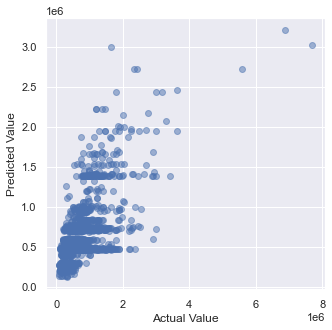

In [20]:
preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Value")
ax.set_ylabel("Predicted Value")

This actually looks like it has a decently linear relationship, with no drastic outliers.

### Normality

C:\Users\shade\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


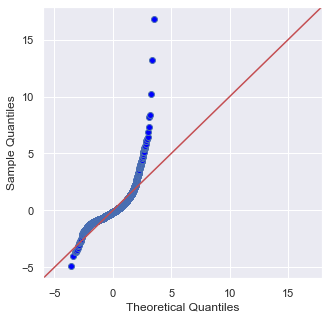

In [21]:
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

Our model also does not violate the Normality assumption.

### Multicollinearity
We already made sure that our model did not violate multicollinearity by removing features in the modeling phase. But we check again in the interest of good practice.

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]

pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

sqft_lot               1.099917
renovated_2000_1       1.011543
grade_11_Excellent     1.035031
grade_12_Luxury        1.026883
grade_13_Mansion       1.004082
grade_4_Low            1.007408
grade_5_Fair           1.020580
grade_6_Low_Average    1.083159
grade_9_Better         1.067679
condition_Fair         1.019445
condition_Good         1.109848
condition_Poor         1.011943
condition_Very_Good    1.040014
view_EXCELLENT         1.567587
view_FAIR              1.015313
view_GOOD              1.042524
waterfront_YES         1.527329
Name: Variance Inflation Factor, dtype: float64

None of these values are above 5, so our model does not violate the assumption of Multicollinearity, as expected.

### Homoscedasticity

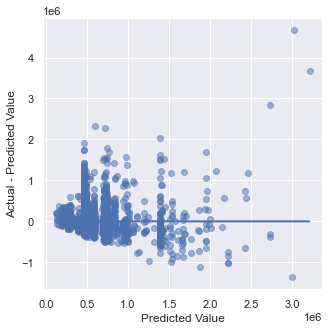

In [23]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test_final))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

Unfortunately, our model shows no Homoscedasticity at all. However, this could be caused by many different factors, and can be expected considering our model has only been trained with a 60% accuracy rate.

## Conclusions

This is not the strongest Linear Regression Model ever made. But it could certainly be used as a baseline predictor for assessing the value of homes in King County.

In [24]:
print(pd.Series(final_model.coef_, index=X_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

sqft_lot               2.235704e-01
renovated_2000_1       2.509331e+05
grade_11_Excellent     9.198402e+05
grade_12_Luxury        1.477032e+06
grade_13_Mansion       2.255579e+06
grade_4_Low           -2.813847e+05
grade_5_Fair          -2.704068e+05
grade_6_Low_Average   -1.950320e+05
grade_9_Better         2.465687e+05
condition_Fair        -6.222622e+04
condition_Good         2.207316e+04
condition_Poor        -3.715552e+04
condition_Very_Good    1.233779e+05
view_EXCELLENT         4.839307e+05
view_FAIR              2.267669e+05
view_GOOD              2.774675e+05
waterfront_YES         5.654622e+05
Name: Coefficients, dtype: float64

Intercept: 463671.91622293484


### Interpretation

# ########view results in actual values!###############

The above shows how our algorithm uses each feature to make determinations about the target price. 

Some of the most positively correlated features according to the model are sqft_living, waterfront, and view_excellent. The coefficients (0.66 for view, 0.63 for waterfront, and 0.50 for sqft_living), are referring to the influence each of these features has on the value of a house, based on the data that has been transformed and standardized for scaling purposes of the model.

This holds true to common assumptions of what would be of value in a house. 

However, there also is a negative correlation to things like grade_5_Fair, and bedrooms_6, while the other grades and bedrooms numbers are positively correlated. This could be e due to rrors in the way our model was trained. 

### Next Steps
The reality is that there is a very broad range of factors that can influence any individual house sale. That being said, we could also explore more features based on commonplace observations. For example, our data contains information on when (in the case of our model, whether) each house was renovated, but not what elements of the house were renovated or what was changed about them. 

Additionally, we could run another analysis of the data using features like the grade, bathrooms, bedrooms, floors, etc. as continuous variables rather than categorical ones. This could lead to less cases like the one in which our model subtracts more value from a house for a 5("Fair") rating than a 4("Low") Rating. 

Furthermore, features like rating could use more exploration, and perhaps be removed from the dataset completely in future analyses.

We could also opt for a ground up approach, analyzing models trained on featuresets based on commonlplace assumptions about house values, instead of a purely data driven approach, which is prone to different kinds of errors.

# ########################################################### 
## put in appropriate spot

### Multicollinearity
We check for multicollinearity between our predictive features by observing the pairwise correlation coefficients and visualizing them in a heatmap.

We will combine all our standardized continuous variables for this test.

In [20]:
test_df = normalized_cont.drop(['price'], axis=1)
test_df.head()

,sqft_living,sqft_lot,yr_built,bedrooms,bathrooms,floors
0,-1.125162,-0.388111,-0.537482,-0.279405,-1.726477,-0.960735
1,0.709983,-0.112980,-0.674395,-0.279405,0.339753,1.006703
2,-2.131578,0.244661,-1.293998,-1.710879,-1.726477,-0.960735
3,0.071161,-0.523567,-0.196421,0.736242,1.072760,-0.960735
4,-0.292266,0.008375,0.547844,-0.279405,0.039645,-0.960735


In [21]:
corr = test_df.corr()
corr

,sqft_living,sqft_lot,yr_built,bedrooms,bathrooms,floors
sqft_living,1.000000,0.326167,0.348830,0.648039,0.760650,0.393070
sqft_lot,0.326167,1.000000,-0.005108,0.196011,0.084837,-0.212503
yr_built,0.348830,-0.005108,1.000000,0.194355,0.533087,0.471678
bedrooms,0.648039,0.196011,0.194355,1.000000,0.534130,0.212680
bathrooms,0.760650,0.084837,0.533087,0.534130,1.000000,0.510306
floors,0.393070,-0.212503,0.471678,0.212680,0.510306,1.000000


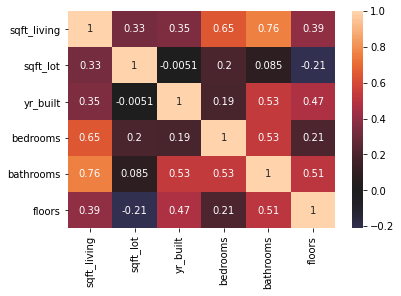

In [22]:
sns.heatmap(corr, center=0, annot=True, );

We can see that there is a strong correlation between square footage and the number of bedrooms or bathrooms in a house. This makes sense, as a larget house has more room for such amenities.